<a href="https://colab.research.google.com/github/Nburkhal/DS-Unit-2-Kaggle-Challenge/blob/master/assignment_kaggle_challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 3

## Assignment
- [x] [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2/portfolio-project/ds6), then choose your dataset, and [submit this form](https://forms.gle/nyWURUg65x1UTRNV9), due today at 4pm Pacific.
- [x] Continue to participate in our Kaggle challenge.
- [x] Try xgboost.
- [x] Get your model's permutation importances.
- [x] Try feature selection with permutation importances.
- [x] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [x] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [x] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [x] Try other categorical encodings.
- [ ] Try other Python libraries for gradient boosting.
- [x] Look at the bonus notebook in the repo, about monotonic constraints with gradient boosting.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_






### Python libraries for Gradient Boosting
- [scikit-learn Gradient Tree Boosting](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting) — slower than other libraries, but [the new version may be better](https://twitter.com/amuellerml/status/1129443826945396737)
  - Anaconda: already installed
  - Google Colab: already installed
- [xgboost](https://xgboost.readthedocs.io/en/latest/) — can accept missing values and enforce [monotonic constraints](https://xiaoxiaowang87.github.io/monotonicity_constraint/)
  - Anaconda, Mac/Linux: `conda install -c conda-forge xgboost`
  - Windows: `conda install -c anaconda py-xgboost`
  - Google Colab: already installed
- [LightGBM](https://lightgbm.readthedocs.io/en/latest/) — can accept missing values and enforce [monotonic constraints](https://blog.datadive.net/monotonicity-constraints-in-machine-learning/)
  - Anaconda: `conda install -c conda-forge lightgbm`
  - Google Colab: already installed
- [CatBoost](https://catboost.ai/) — can accept missing values and use [categorical features](https://catboost.ai/docs/concepts/algorithm-main-stages_cat-to-numberic.html) without preprocessing
  - Anaconda: `conda install -c conda-forge catboost`
  - Google Colab: `pip install catboost`

### Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categorcals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

In [1]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # eli5, version >= 0.9
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders eli5 pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module3')

     |████████████████████████████████| 92kB 2.8MB/s 
     |████████████████████████████████| 102kB 26.3MB/s 
     |████████████████████████████████| 133kB 42.2MB/s 
     |████████████████████████████████| 7.1MB 42.5MB/s 
     |████████████████████████████████| 614kB 37.9MB/s 
     |████████████████████████████████| 225kB 19.0MB/s 
     |████████████████████████████████| 768kB 40.2MB/s 
     |████████████████████████████████| 51kB 19.8MB/s 
     |████████████████████████████████| 194kB 44.9MB/s 
     |████████████████████████████████| 737kB 40.0MB/s 
     |████████████████████████████████| 51kB 19.9MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145036 sha256=b688c498ea9305d498682444ecaa9c8bc59eaecb2eaeb63f7ebd6defaa5d1001
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=5918c5a090eb0fe63

In [0]:
# Import necessary modules
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from xgboost import XGBClassifier


# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

In [3]:
train.shape, test.shape

((59400, 41), (14358, 40))

In [4]:
# Train/Validate/Test split the data
train, val = train_test_split(
    train, train_size=0.80, test_size=0.20,
    stratify=train['status_group'], random_state=4
)

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [0]:
def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    # Also create a "missing indicator" column, because the fact that
    # values are missing may be a predictive signal.
    cols_with_zeros = ['longitude', 'latitude', 'construction_year', 
                       'gps_height', 'population']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
        X[col+'_MISSING'] = X[col].isnull()
        
    # Get more accurate description of lat & lon (3D representation)
    # https://datascience.stackexchange.com/questions/13567/ways-to-deal-with-longitude-latitude-feature
    X['x'] = np.cos(X['latitude']) * np.cos(X['longitude'])
    X['y'] = np.cos(X['latitude']) * np.sin(X['longitude'])
    X['z'] = np.sin(X['latitude'])
            
    # Drop duplicate columns
    duplicates = ['quantity_group', 'payment_type']
    X = X.drop(columns=duplicates)
    
    # Drop recorded_by (never varies) and id (always varies, random)
    unusable_variance = ['recorded_by', 'id']
    X = X.drop(columns=unusable_variance)
    
    # Convert date_recorded to datetime
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
    # Extract components from date_recorded, then drop the original column
    X['year_recorded'] = X['date_recorded'].dt.year
    X['month_recorded'] = X['date_recorded'].dt.month
    X['day_recorded'] = X['date_recorded'].dt.day
    X = X.drop(columns='date_recorded')
    
    # Engineer feature: how many years from construction_year to date_recorded
    X['years'] = X['year_recorded'] - X['construction_year']
    X['years_MISSING'] = X['years'].isnull()
    
    # Engineer Feature: is water quality_group is  good and quantity is enough
    X['good_quality'] = (X['quality_group'] == 'good').astype(int)
    X['enough_quantity'] = (X['quantity'] == 'enough').astype(int)
    X['good_enough'] = ((X['quality_group'] == 'good') & 
                      (X['quantity'] == 'enough')).astype(int)
    
    # Engineer features: is alt greater than 552/ group altitudes into bins
    X['greater_than_552'] = (X['gps_height'] > 552).astype(int)
    X['altitude_group'] = pd.qcut(X['gps_height'], 10, labels=['A', 'B', 'C', 
                                                              'D', 'E', 'F',
                                                              'G', 'H', 'I', 
                                                              'J'])
    
    # return the wrangled dataframe
    return X

In [6]:
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)
train.shape, val.shape, test.shape

((47520, 54), (11880, 54), (14358, 53))

In [7]:
# Select features

# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality.index.tolist()

# Combine the lists 
features = numeric_features + categorical_features
print(len(features))

53


In [0]:
# Arrange data into X features matrix and y target vector
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [9]:
# do XGBoost on the dataset

# Encode categorical variables
transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

X_train_transformed.shape, X_val_transformed.shape

((47520, 53), (11880, 53))

In [10]:
eval_set = [(X_train_transformed, y_train), 
           (X_val_transformed, y_val)]

model = XGBClassifier(
    booster='dart', 
    n_estimators=1000, 
    max_depth=6, 
    learning_rate=0.5,  
    n_jobs=-1, 
    random_state=42
)

model.fit(X_train_transformed, y_train, early_stopping_rounds=50, 
         eval_metric='merror', eval_set=eval_set)

[0]	validation_0-merror:0.263173	validation_1-merror:0.270707
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.256166	validation_1-merror:0.263552
[2]	validation_0-merror:0.246002	validation_1-merror:0.254714
[3]	validation_0-merror:0.237205	validation_1-merror:0.248485
[4]	validation_0-merror:0.232092	validation_1-merror:0.245455
[5]	validation_0-merror:0.224369	validation_1-merror:0.239226
[6]	validation_0-merror:0.221338	validation_1-merror:0.236616
[7]	validation_0-merror:0.215614	validation_1-merror:0.230471
[8]	validation_0-merror:0.21109	validation_1-merror:0.228114
[9]	validation_0-merror:0.207597	validation_1-merror:0.225926
[10]	validation_0-merror:0.204566	validation_1-merror:0.224495
[11]	validation_0-merror:0.200358	validation_1-merror:0.222559
[12]	validation_0-merror:0.196928	validation_1-merror:0.221549
[13]	validation_0-merror:0.19

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [11]:
y_pred = model.predict(X_val_transformed)
accuracy_score(y_val, y_pred)

0.7884680134680134

In [12]:
# Get permutation importance
import eli5
from eli5.sklearn import PermutationImportance


permuter = PermutationImportance(
    model, scoring='accuracy', n_iter=2, random_state=42
)

permuter.fit(X_val_transformed, y_val)
feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=feature_names
)

Weight,Feature
0.0891 ± 0.0045,quantity
0.0309 ± 0.0005,waterpoint_type
0.0172 ± 0.0005,population
0.0146 ± 0.0011,x
0.0130 ± 0.0004,enough_quantity
0.0107 ± 0.0024,payment
0.0104 ± 0.0005,construction_year
0.0103 ± 0.0015,latitude
0.0100 ± 0.0008,extraction_type_class
0.0092 ± 0.0001,extraction_type


In [13]:
# Remove minimum importance features
minimum_importance = 0
mask = permuter.feature_importances_ > 0
features = X_train.columns[mask]
X_train = X_train[features]
X_val = X_val[features]

X_train.shape, X_val.shape

((47520, 42), (11880, 42))

In [14]:
# do XGBoost on the dataset (again)

# Encode categorical variables
transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

X_train_transformed.shape, X_val_transformed.shape

((47520, 42), (11880, 42))

In [15]:
eval_set = [(X_train_transformed, y_train), 
           (X_val_transformed, y_val)]

model = XGBClassifier(
    booster='dart', 
    n_estimators=1000, 
    max_depth=6, 
    learning_rate=0.5,  
    n_jobs=-1, 
    random_state=42
)

model.fit(X_train_transformed, y_train, early_stopping_rounds=50, 
         eval_metric='merror', eval_set=eval_set)

[0]	validation_0-merror:0.263657	validation_1-merror:0.272306
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.256881	validation_1-merror:0.264983
[2]	validation_0-merror:0.248611	validation_1-merror:0.257323
[3]	validation_0-merror:0.238699	validation_1-merror:0.25
[4]	validation_0-merror:0.230303	validation_1-merror:0.242761
[5]	validation_0-merror:0.224516	validation_1-merror:0.238047
[6]	validation_0-merror:0.220833	validation_1-merror:0.235774
[7]	validation_0-merror:0.216625	validation_1-merror:0.234428
[8]	validation_0-merror:0.211637	validation_1-merror:0.229461
[9]	validation_0-merror:0.207218	validation_1-merror:0.22702
[10]	validation_0-merror:0.204251	validation_1-merror:0.225253
[11]	validation_0-merror:0.201957	validation_1-merror:0.222896
[12]	validation_0-merror:0.198253	validation_1-merror:0.221549
[13]	validation_0-merror:0.196254

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [16]:
# Try a random forest
rf = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'),  
    RandomForestClassifier(n_estimators=350, min_samples_leaf=3, n_jobs=-1, 
                           random_state=42, max_features=.25, oob_score=True)
)

# Fit on train
rf.fit(X_train, y_train)

# Score on val
print('Train Accuracy:', rf.score(X_train, y_train))
print('Validation Accuracy:', rf.score(X_val, y_val))

Train Accuracy: 0.9283459595959596
Validation Accuracy: 0.8112794612794613


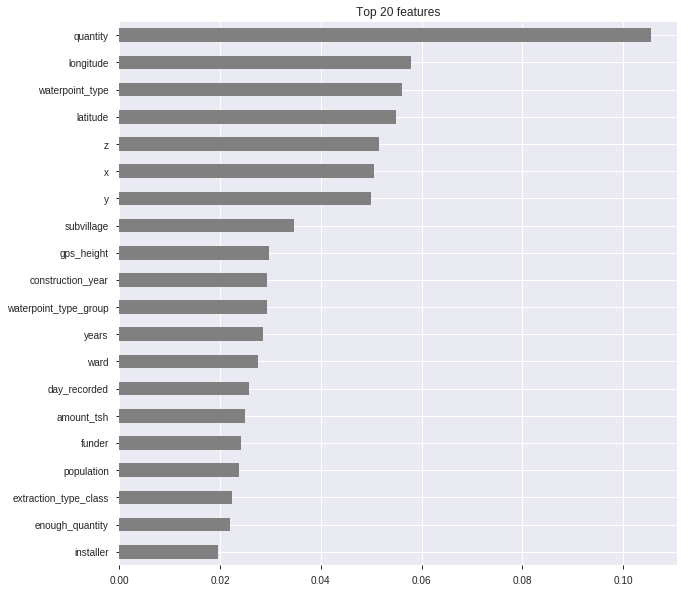

In [17]:
# Get rf feature importances
forest = rf.named_steps['randomforestclassifier']
importances = pd.Series(forest.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [18]:
# Get rf permutation importances
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=350, min_samples_leaf=3, n_jobs=-1, 
                               random_state=42, max_features=.25, oob_score=True)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [19]:
permuter = PermutationImportance(
    model, scoring='accuracy', n_iter=2, random_state=42
)

permuter.fit(X_val_transformed, y_val)
feature_names = X_val.columns.tolist()
eli5.show_weights(
    permuter, 
    top=None,  # show the permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
0.0835 ± 0.0040,quantity
0.0244 ± 0.0008,waterpoint_type
0.0136 ± 0.0022,amount_tsh
0.0081 ± 0.0015,population
0.0056 ± 0.0011,extraction_type_class
0.0050 ± 0.0006,latitude
0.0048 ± 0.0016,enough_quantity
0.0047 ± 0.0015,z
0.0046 ± 0.0010,y
0.0045 ± 0.0025,funder


In [20]:
# Just playing around at this point
# What happens if we drop features w/ < .001 importance and run the model again?
minimum_importance = 0
mask = permuter.feature_importances_ > 0.001
features = X_train.columns[mask]
X_train = X_train[features]
X_val = X_val[features]

X_train.shape, X_val.shape

((47520, 33), (11880, 33))

In [21]:
rf = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'),  
    RandomForestClassifier(n_estimators=350, min_samples_leaf=3, n_jobs=-1, 
                           random_state=42, max_features=.25, oob_score=True)
)

# Fit on train
rf.fit(X_train, y_train)

# Score on val
print('Train Accuracy:', rf.score(X_train, y_train))
print('Validation Accuracy:', rf.score(X_val, y_val))

Train Accuracy: 0.927672558922559
Validation Accuracy: 0.8091750841750842


In [22]:
# What about a dart boost?

# Encode categorical variables
transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

X_train_transformed.shape, X_val_transformed.shape

((47520, 33), (11880, 33))

In [23]:
eval_set = [(X_train_transformed, y_train), 
           (X_val_transformed, y_val)]

model = XGBClassifier(
    booster='dart', 
    n_estimators=1000, 
    max_depth=6, 
    learning_rate=0.5,  
    n_jobs=-1, 
    random_state=42
)

model.fit(X_train_transformed, y_train, early_stopping_rounds=50, 
         eval_metric='merror', eval_set=eval_set)

[0]	validation_0-merror:0.264141	validation_1-merror:0.271633
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.256587	validation_1-merror:0.265909
[2]	validation_0-merror:0.245749	validation_1-merror:0.255556
[3]	validation_0-merror:0.240383	validation_1-merror:0.25202
[4]	validation_0-merror:0.233165	validation_1-merror:0.24596
[5]	validation_0-merror:0.227315	validation_1-merror:0.241582
[6]	validation_0-merror:0.218792	validation_1-merror:0.235269
[7]	validation_0-merror:0.214878	validation_1-merror:0.23165
[8]	validation_0-merror:0.210438	validation_1-merror:0.229545
[9]	validation_0-merror:0.207807	validation_1-merror:0.228283
[10]	validation_0-merror:0.205913	validation_1-merror:0.226852
[11]	validation_0-merror:0.203346	validation_1-merror:0.225926
[12]	validation_0-merror:0.199747	validation_1-merror:0.225253
[13]	validation_0-merror:0.1974

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

##And with that, I'm done...!

In [0]:
X_test = test[features]

assert all(X_train.columns == X_test.columns)

In [0]:
# Predict on test
y_pred = rf.predict(X_test)


# Write submission csv file
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('Burkhalter_DS6_Unit2_submission10.csv', index=False)

In [27]:
!head Burkhalter_DS6_Unit2_submission10.csv

id,status_group
50785,non functional
51630,functional
17168,functional
45559,non functional
49871,functional
52449,functional
24806,non functional
28965,non functional
36301,non functional


In [0]:
from google.colab import files

if in_colab:
  files.download('Burkhalter_DS6_Unit2_submission10.csv')

In [0]:
files.download('Burkhalter_DS6_Unit2_submission10.csv')